## Simple Linear Regression (from scratch)   (من الصفر) الارتباط الخطي  

## 1 - Import liberaries استيراد المكتبات

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2 - Load the data تحميل البيانات

In [3]:
data= np.loadtxt('data/data.txt',delimiter=',')
X=data[:,0]
y=data[:,1]
del data

#print the 5 first data
for i in range(5):
    print(X[i],y[i])

6.1101 17.592
5.5277 9.1302
8.5186 13.662
7.0032 11.854
5.8598 6.8233


## 3 - Plotting the data تمثيل المعطيات على شكل بياني

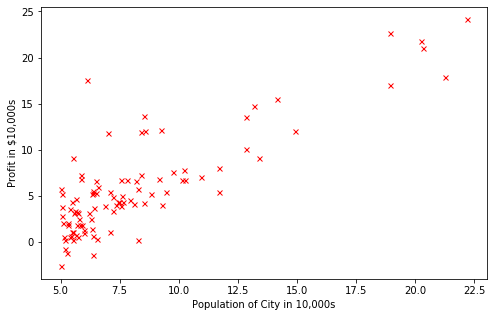

In [4]:
def plotData(X,y):
    plt.figure(figsize=(8,5))
    plt.plot(X,y,'rx',markersize=5)
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')
    plt.show()

plotData(X,y)

## 4 - Gradient descent النزول الاشتقاقي

### 4.1 - Parameters الإعدادات اللازمة للتدريب

In [5]:
learning_rate = 0.01
iterations = 1500
X_t = np.column_stack((np.ones((X.shape[0],1)),X))

<h3 align="center">   لماذا أضفنا عمود يتكون من الرقم 1</h3>  
<img src="assets/add one.png"  width="400" height="400">

### 4.2 - Model  النموذج

In [6]:
def model(W,X): 
    return np.dot(X,W)

### 4.3 - Cost Function دالة التكلفة
<img src="assets/CostFunction.png"  width="400" height="400">

In [7]:
def costFunction(W,X,y):
    return np.power(np.subtract(model(W,X).T,y),2).sum()/(2 * y.shape[0])

### 4.4 Opttimization function (Gradient Descent) التحسين

<img src="assets/gradient.PNG"  width="400" height="400">

In [8]:
def GradientDescent(X, y, learning_rate, num_iter):
    J_hist=np.zeros((num_iter,1)) #Used to plot cost as function of iteration
    weights = np.zeros((2,1))
    for i in range(num_iter):
        weights=np.subtract(weights, learning_rate*(np.dot(X.T,np.subtract(model(weights,X).T,y).T)/y.shape[0]))        
        J_hist[i]=costFunction(weights, X, y)
    return J_hist, weights

### 4.5 Training التدريب

In [9]:
j, weights = GradientDescent(X_t, y, learning_rate, iterations)

### 4.6 - Plotting the fit line رسم الخط المستقيم

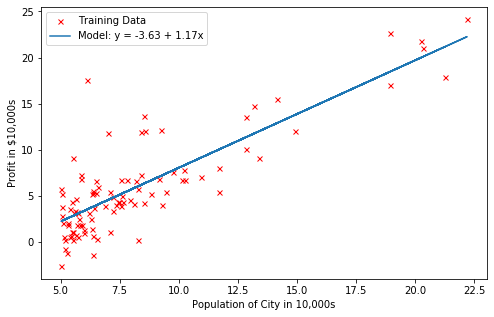

In [10]:
plt.figure(figsize=(8,5))
plt.plot(X,y,'rx',markersize=5, label='Training Data')
plt.plot(X,model(weights,X_t),'-',label='Model: y = %0.2f + %0.2fx'%(weights[0],weights[1]))
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()
plt.show()

### 4.7 Plotting the cost function history  تمثيل بياني للقيم السابقة لنسبة الخطأ

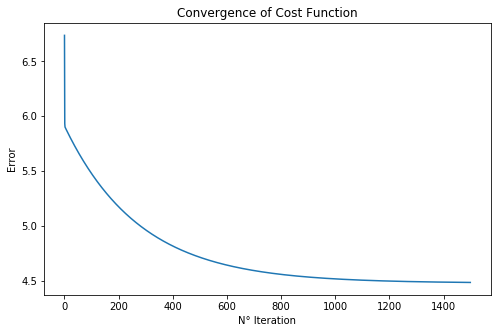

In [11]:
plt.figure(figsize=(8,5))
plt.plot(range(iterations),j)
plt.title("Convergence of Cost Function")
plt.xlabel('N° Iteration')
plt.ylabel('Error')
plt.show()

## 5 - Prediction توقع قيم جديدة

In [12]:
value_1 = 15
value_2 = 7.5
print('For population = 150,000, we predict a profit of ','%0.2f'%model(weights, np.array([1,value_1])*10000))
print('For population = 75,000, we predict a profit of ','%0.2f'%model(weights, np.array([1,value_2])*10000))

For population = 150,000, we predict a profit of  138651.44
For population = 75,000, we predict a profit of  51174.26


### 5.1 - Plotting prdictions رسم قيم البيانات الجديدة

In [15]:
#plot predicted values
def plotPredictedValue(W,y,W_t,weights,value):
    plt.figure(figsize=(8,5))
    plt.ylim(-5,30)
    plt.xlim(4,25)
    plt.plot(X,y,'r+',label='Training data')
    plt.plot(X,model(weights,X_t),'-',label='Model: y = %0.2f + %0.2fx'%(weights[0],weights[1]))
    plt.plot([value, value], [-6, float(model(weights, np.array([1,value])))],'g--')
    plt.plot([0, value], [float(model(weights, np.array([1,value]))), float(model(weights, np.array([1,value])))],'g--')
    plt.legend()
    plt.show()

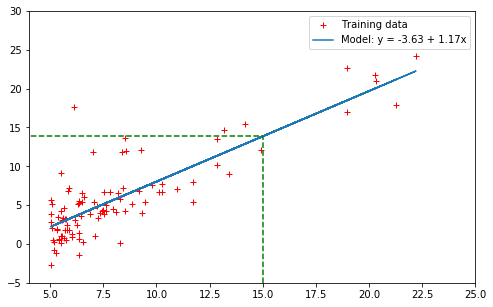

In [16]:
plotPredictedValue(X,y,X_t,weights,15)